# Introdução à Computação Quântica com Qiskit

Este notebook apresenta de forma didática:

- Inicialização de circuitos quânticos utilizando o **Basic provider**
- Demonstração das portas quânticas básicas (Portas Pauli: I, X, Y, Z) com visualização nas esferas de Bloch
  - **Observação:** A medição será realizada somente após a apresentação de todas as portas básicas
- Criação de estados de Bell
- Implementação do algoritmo de Grover


In [14]:
# Importação das bibliotecas necessárias
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import DiagonalGate
from math import sqrt,floor
from math import pi


from qiskit.visualization import visualize_transition

import matplotlib.pyplot as plt
import numpy as np

# Exibindo a versão do Qiskit
import qiskit
print('Qiskit version:', qiskit.__version__)


Qiskit version: 2.0.0


# Criação de um circuito quântico

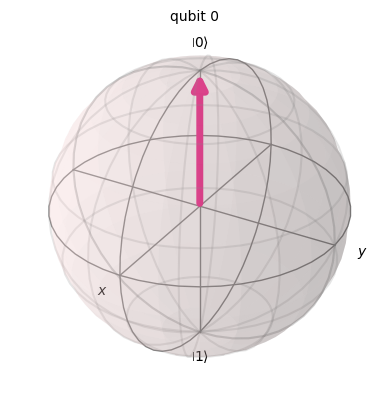

In [15]:
qc = QuantumCircuit(1)

plot_bloch_multivector(qc)

# Porta Identidade (id)

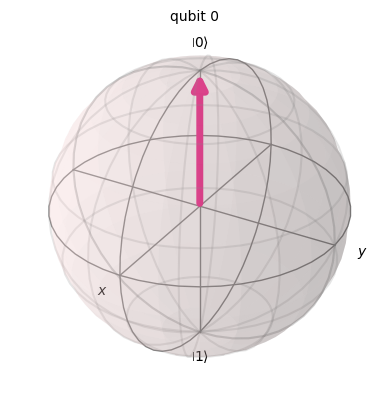

In [16]:
qc.id(0)

plot_bloch_multivector(qc)

# Pauli-X

In [17]:
qc.data = [] # reseta o circuito

In [18]:
qc.x(0)

# visualize_transition(qc, fpg=30)

# Pauli-Y

In [19]:
qc.data = [] # reseta o circuito

In [20]:
qc.y(0)

# visualize_transition(qc, fpg=30)

# Hadamard (h)

In [21]:
qc.data = [] # reseta o circuito

qc.h(0)

# visualize_transition(qc, fpg=30)

# Pauli-Z

In [22]:
qc.data = [] # reseta o circuito

qc.z(0)

# visualize_transition(qc, fpg=30)

In [23]:
qc.data = [] # reseta o circuito

qc.h(0)
qc.z(0)

# visualize_transition(qc, fpg=30)

# Medição

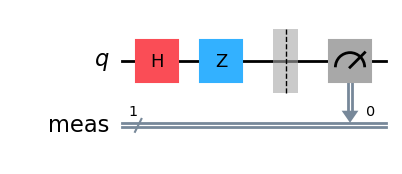

In [24]:
qc = QuantumCircuit(1)

qc.h(0)
qc.z(0)

qc.measure_all()

qc.draw("mpl")

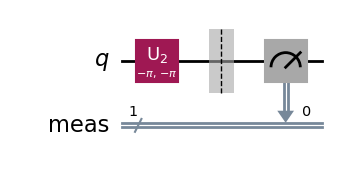

In [25]:
# Execução do ciruito via simulador
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots=1024)
result = job.result()
new_circuit.draw("mpl")

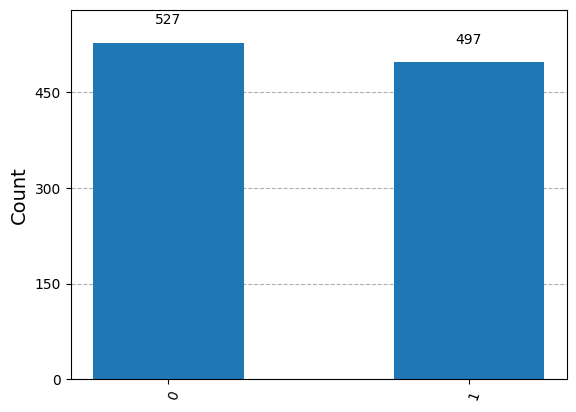

In [26]:
# Obtenção e visualização dos resultados, via histograma
counts = result.get_counts(qc)
plot_histogram(counts)

# Experimento

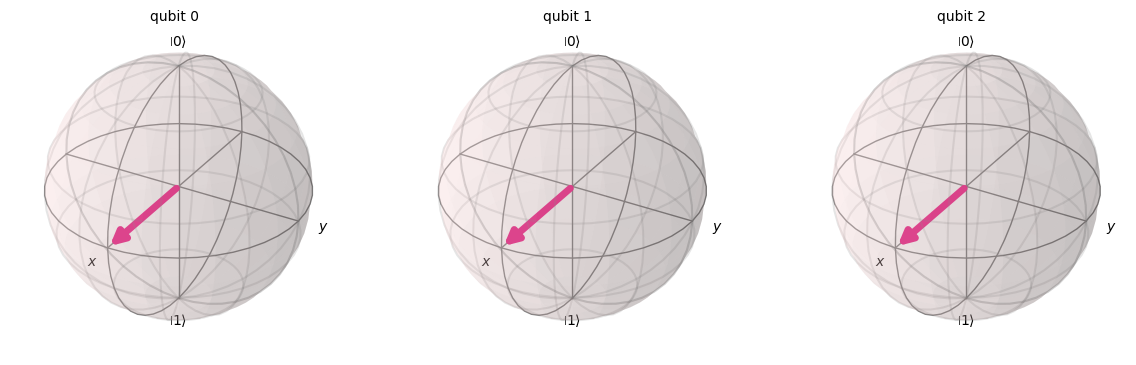

In [27]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

plot_bloch_multivector(Statevector(qc))

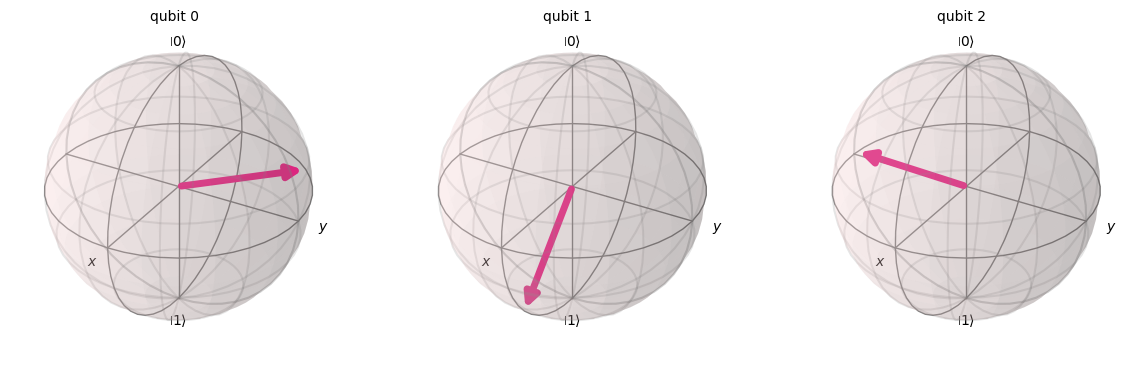

In [28]:
# qubit 0
qc.rz(3*pi/4,0)
# qubit 1
qc.ry(pi/4,1)
# qubit 2
qc.ry(-pi/4,2)
qc.rx(pi/4,2)

plot_bloch_multivector(Statevector(qc))

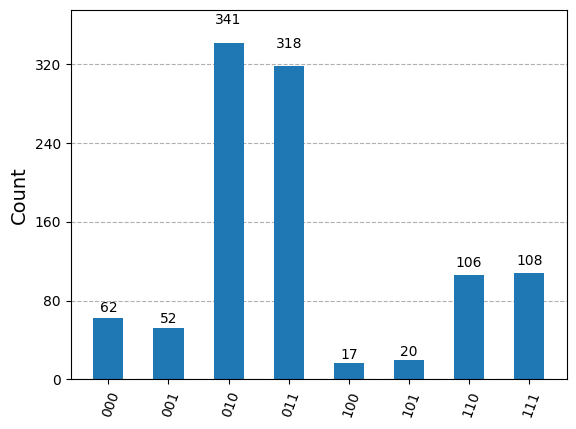

In [29]:
qc.measure_all()

# Execução do ciruito via simulador
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots=1024)
result = job.result()

# Obtenção e visualização dos resultados, via histograma
counts = result.get_counts(qc)
plot_histogram(counts)

# Bell

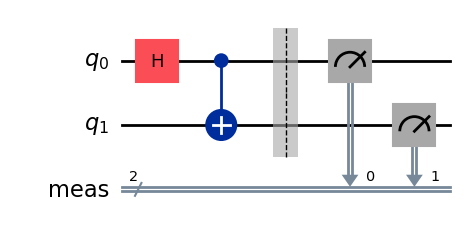

In [30]:
# Criação do circuito para o estado de Bell
bell = QuantumCircuit(2)

# Aplica Hadamard no primeiro qubit
bell.h(0)

# Aplica CNOT com o primeiro qubit como controle e o segundo como alvo
bell.cx(0, 1)

# Medição dos qubits
bell.measure_all()

bell.draw("mpl")

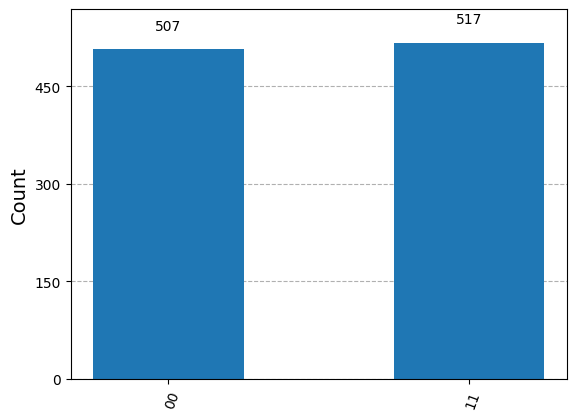

In [31]:
# Execução do ciruito via simulador
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(bell, backend)
job = backend.run(new_circuit, shots=1024)
result = job.result()

# Obtenção e visualização dos resultados, via histograma
counts = result.get_counts(bell)
plot_histogram(counts)

# Algoritmo de Grover

O algoritmo de Grover é um método quântico para busca em listas não ordenadas. Os passos básicos incluem:

1. **Inicialização:** Aplica-se a porta Hadamard em todos os qubits para criar uma superposição.
2. **Oráculo:** Marca o estado alvo invertendo o sinal do estado desejado.
3. **Difusão:** Amplifica a amplitude do estado marcado invertendo os estados sobre a média.
4. **Repetição:** Os passos de oráculo e difusão são repetidos um número ideal de vezes.
5. **Medição:** Os qubits são medidos para identificar o estado alvo.

No exemplo a seguir, buscamos o estado alvo `101` em um sistema de 3 qubits.

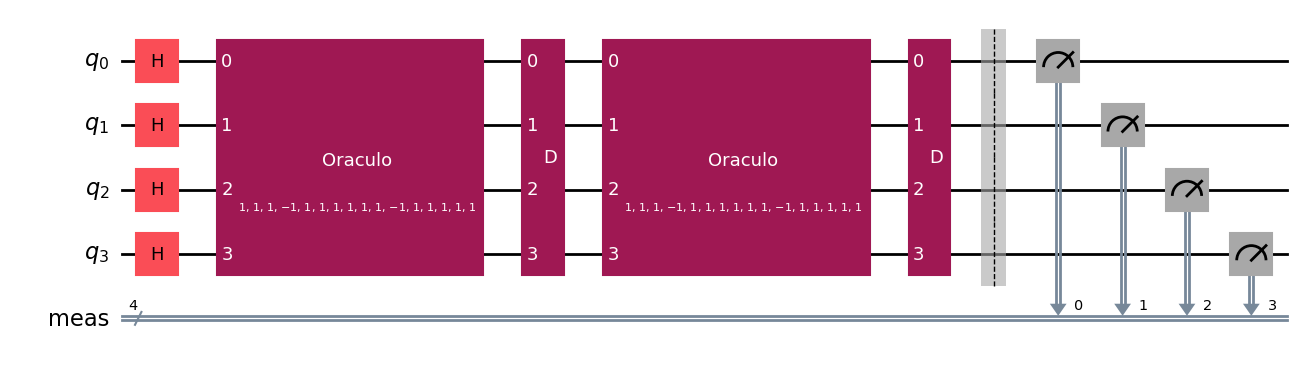

In [32]:
N=4
faseBuscada=['0011','1010']

#preparação da matriz de rotaço
diagonalMatrizRotacao = -np.ones(2**N,dtype=int)
diagonalMatrizRotacao[0] = 1
matrizRotacao = DiagonalGate(diagonalMatrizRotacao)
matrizRotacao.name = 'R'

#preparação da matriz de difusão
matrizDifusao = QuantumCircuit(N, name='D')
matrizDifusao.h(range(N))
matrizDifusao.append(matrizRotacao,range(N))
matrizDifusao.h(range(N))

#preparação do oráculo
rotacaoFase = np.ones(2**N,dtype=int)
#rotaciona cada estado buscado
for estado in faseBuscada:
    rotacaoFase[int(estado,2)] = -1
oraculo = DiagonalGate(rotacaoFase)
oraculo.name='oraculo'

#Passo 1
Grover = QuantumCircuit(N)
Grover.h(range(N))

#passo 2
for i in range(floor(sqrt(N))):
    #etapa I
    Grover.append(oraculo,range(N))
    #etapa II
    Grover.append(matrizDifusao,range(N))

#passo 3
Grover.measure_all()

Grover.draw('mpl')

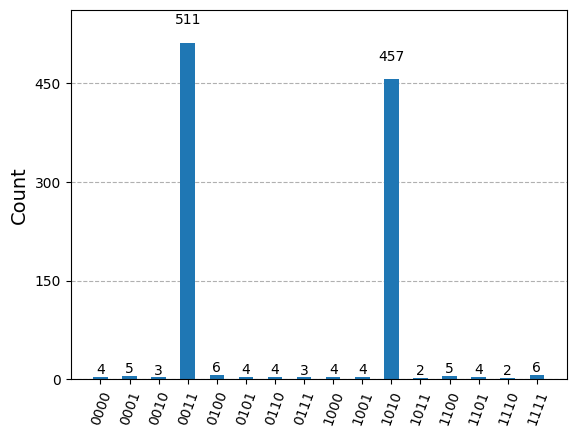

In [33]:
# Execução do ciruito via simulador
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(Grover, backend)
job = backend.run(new_circuit, shots=1024)
result = job.result()

# Obtenção e visualização dos resultados, via histograma
counts = result.get_counts(Grover)
plot_histogram(counts)

# Repositorio git hub:

![title](qr_git.png)